# Intermediate UNIX Shell

### The command line interface in a Linux environment

#### John Stachurski 

In [1]:
!date

Tue Jan 12 14:06:51 EST 2016


This notebook is to familiarize you with the UNIX shell in a Linux environment.  

I'm using the [Z Shell](https://en.wikipedia.org/wiki/Z_shell) but most of the following will work on any standard UNIX shell (bash, etc.)


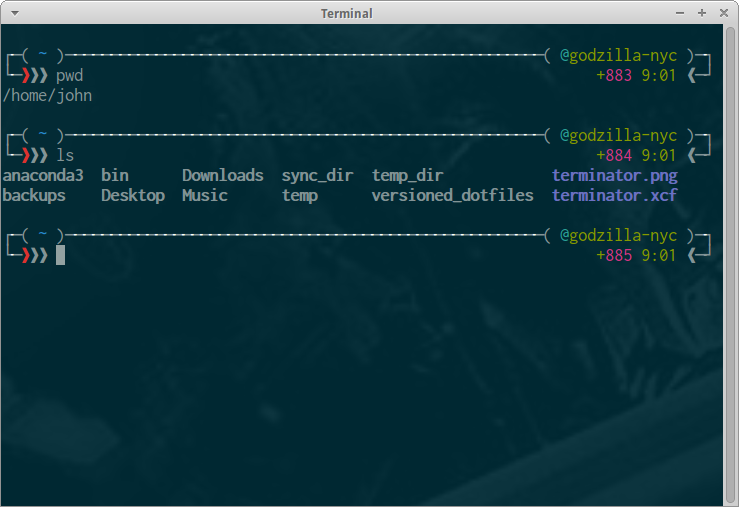

In [2]:
from IPython.display import Image
Image("terminal.png", width=600)

This lesson is written up in a Jupyter notebook because it's an easy way to store a list of commands and their output.  In Jupyter, input is treated as a shell command whenever it starts with ``!``.  For example

In [3]:
!echo $SHELL

/bin/zsh


If I forget the ``!`` I get an error because my command is interpreted as a Python command:

In [4]:
echo $SHELL

SyntaxError: invalid syntax (<ipython-input-4-dd2e812df2f9>, line 1)

However, there are some [IPython magics](http://ipython.readthedocs.org/en/stable/interactive/magics.html) that mimic shell commands and work without any quanlifier.  The next command moves us to my home directory.

In [5]:
cd ~ 

/home/john


To show the present working dir use `pwd`

In [6]:
pwd 

'/home/john'

To list its contents use `ls`

In [7]:
ls

anaconda3/  Desktop/    sync_dir/       terminator.xcf
backups/    Downloads/  temp/           versioned_dotfiles/
bin/        Music/      terminator.png


We could add the ``!`` but it wouldn't make any difference.

In [8]:
!pwd

/home/john


If you're working directly in the shell then of course you should omit the ``!``

### File System

The top of the directory tree looks like this on my machine:

In [24]:
ls /

bin/    dev/   initrd.img@  lost+found/  opt/   run/   sys/  var/
boot/   etc/   lib/         media/       proc/  sbin/  tmp/  vmlinuz@
cdrom/  home/  lib64/       mnt/         root/  srv/   usr/


Some comments

* ``bin`` and ``usr/bin`` directories are where most executables (applications) live
* many shared libraries in ``usr/lib``
* The ``home`` directory is where users store personal files
* ``etc`` is home to system wide configuration files
* ``var`` is where logs are written to
* ``media`` is where you'll find your USB stick after you plug it in

### Searching

I have a paper by Lars Hansen on asset pricing somewhere in my file system but I can't remember where.  One quick way to find files is to use the ``locate`` command.

In [25]:
!locate hansen

/home/john/Desktop/PDFs/Econometrics_bruce_hansen.pdf
/home/john/Desktop/PDFs/hansen_averaging_ecma.pdf
/home/john/Desktop/PDFs/hansen_shrinkage_qe.pdf
/home/john/backups/sync_dir_backup/papers/asset_prices/hansen_nobel.pdf
/home/john/backups/sync_dir_backup/papers/lae_stats/references/chen_hansen_carrasco.pdf
/home/john/backups/sync_dir_backup/to_read/sargent_hansen_2012.pdf
/home/john/backups/sync_dir_backup/to_read/sargent_hansen_knightian.pdf
/home/john/backups/sync_dir_backup/to_read/financial_econometrics/scheinkman_aitsahalia_hansen.pdf
/home/john/backups/sync_dir_backup/work/referee_reports/hansen_sargent
/home/john/backups/sync_dir_backup/work/referee_reports/hansen_sargent/report.aux
/home/john/backups/sync_dir_backup/work/referee_reports/hansen_sargent/report.log
/home/john/backups/sync_dir_backup/work/referee_reports/hansen_sargent/report.pdf
/home/john/backups/sync_dir_backup/work/referee_reports/hansen_sargent/report.tex
/home/john/sync_dir/papers/asset_prices/hansen_nobe

For more sophisticated searches I use ``find``.  

For example, let's find all Julia files in ``/home/john/sync_dir`` and below that contain the phrase ``cauchy``.

In [26]:
!find ~/sync_dir/ -name "*cauchy*.jl"

/home/john/sync_dir/books/quant-econ/QuantEcon.applications/lln_clt/cauchy_samples.jl
/home/john/sync_dir/books/quant-econ/private/_backup/html/_static/QuantEcon.applications/lln_clt/cauchy_samples.jl
/home/john/sync_dir/books/quant-econ/private/_backup/html/_static/QuantEcon.jl/examples/cauchy_samples.jl
/home/john/sync_dir/books/quant-econ/private/_build/html/_static/QuantEcon.applications/lln_clt/cauchy_samples.jl
/home/john/sync_dir/books/quant-econ/private/_build/html/_static/QuantEcon.jl/examples/cauchy_samples.jl


The next command finds all files ending in "tex" modified within the last week:

In [2]:
!find /home/john/sync_dir/ -mtime -7 -name "*.tex"

/home/john/sync_dir/papers/fwd_looking/fwdlook.tex
/home/john/sync_dir/teaching/nyu/functional_analysis_intro/fa.tex
/home/john/sync_dir/teaching/nyu/functional_analysis_intro/fa_homework.tex
/home/john/sync_dir/teaching/nyu/advanced_python/adv_py.tex
/home/john/sync_dir/teaching/nyu/coding_foundations/hw_coding_foundations.tex
/home/john/sync_dir/teaching/nyu/coding_foundations/foundations.tex
/home/john/sync_dir/teaching/nyu/core_python/core_py.tex


### Working with Text Files

When working with specific text files we often use a text editor.  However, it's also possible to do a significant amount of work directly from the command line.  Here are some examples.

In [50]:
cd ~/temp_dir

/home/john/temp_dir


In [51]:
ls

We're going to make a text file using the shell redirection operator ``>``

In [52]:
!ls -l ~/sync_dir/books

total 44
drwxrwxr-x 16 john john 20480 Dec 31 10:48 econometric_theory
drwxrwxr-x  5 john john  4096 Jul  3  2015 kn
drwxrwxr-x 12 john john  4096 Jan  8 13:07 quant-econ
drwxrwxr-x 11 john john 12288 Dec 21 09:55 sed
drwxrwxr-x 10 john john  4096 Jul  3  2015 sed2


In [53]:
!ls -l ~/sync_dir/books > list_books.txt

In [54]:
ls

list_books.txt


We can read the contents of this text file with ``cat``

In [55]:
!cat list_books.txt

total 44
drwxrwxr-x 16 john john 20480 Dec 31 10:48 econometric_theory
drwxrwxr-x  5 john john  4096 Jul  3  2015 kn
drwxrwxr-x 12 john john  4096 Jan  8 13:07 quant-econ
drwxrwxr-x 11 john john 12288 Dec 21 09:55 sed
drwxrwxr-x 10 john john  4096 Jul  3  2015 sed2


We can search within this file using ``grep``

In [56]:
!grep Dec list_books.txt

drwxrwxr-x 16 john john 20480 Dec 31 10:48 econometric_theory
drwxrwxr-x 11 john john 12288 Dec 21 09:55 sed


We can show just the top of the file using ``head"

In [58]:
!head -2 list_books.txt

total 44
drwxrwxr-x 16 john john 20480 Dec 31 10:48 econometric_theory


We can also append to files using the ``>>`` operator

In [59]:
!date > new_file.txt

In [60]:
ls

list_books.txt  new_file.txt


In [61]:
!cat new_file.txt

Tue Jan 12 14:10:55 EST 2016


In [62]:
!date >> new_file.txt

In [63]:
!cat new_file.txt

Tue Jan 12 14:10:55 EST 2016
Tue Jan 12 14:11:03 EST 2016


We can change "Jan" to "January" using the ``sed`` line editor

In [64]:
!sed 's/Jan/January/' new_file.txt

Tue January 12 14:10:55 EST 2016
Tue January 12 14:11:03 EST 2016


### Putting Commands Together

The command line becomes very powerful when we start linking the commands shown above into compound commands.  Most often this is done with a pipe.  The symbol for a pipe is ``|``.

Let's look at some examples.

The first command searches for files with the phrase ``hansen`` and pipes the output to ``grep``, which filters for lines containing ``sargent``

In [65]:
!locate hansen | grep sargent

/home/john/backups/sync_dir_backup/to_read/sargent_hansen_2012.pdf
/home/john/backups/sync_dir_backup/to_read/sargent_hansen_knightian.pdf
/home/john/backups/sync_dir_backup/work/referee_reports/hansen_sargent
/home/john/backups/sync_dir_backup/work/referee_reports/hansen_sargent/report.aux
/home/john/backups/sync_dir_backup/work/referee_reports/hansen_sargent/report.log
/home/john/backups/sync_dir_backup/work/referee_reports/hansen_sargent/report.pdf
/home/john/backups/sync_dir_backup/work/referee_reports/hansen_sargent/report.tex
/home/john/sync_dir/to_read/sargent_hansen_2012.pdf
/home/john/sync_dir/to_read/sargent_hansen_knightian.pdf
/home/john/sync_dir/work/referee_reports/hansen_sargent
/home/john/sync_dir/work/referee_reports/hansen_sargent/report.aux
/home/john/sync_dir/work/referee_reports/hansen_sargent/report.log
/home/john/sync_dir/work/referee_reports/hansen_sargent/report.pdf
/home/john/sync_dir/work/referee_reports/hansen_sargent/report.tex


Let's do the same but print only the first 5 hits

In [66]:
!locate hansen | grep sargent | head -5

/home/john/backups/sync_dir_backup/to_read/sargent_hansen_2012.pdf
/home/john/backups/sync_dir_backup/to_read/sargent_hansen_knightian.pdf
/home/john/backups/sync_dir_backup/work/referee_reports/hansen_sargent
/home/john/backups/sync_dir_backup/work/referee_reports/hansen_sargent/report.aux
/home/john/backups/sync_dir_backup/work/referee_reports/hansen_sargent/report.log


As an exercise, let's see how many Python files I have in ``/home/john/``.  

In [67]:
!find ~ -name "*.py" | wc -l

33067


Here ``wc`` is a program that counts words, lines or characters, and ``-l`` requests the number of lines

Let's see if any Python files in my papers directory contain the phrase ``bellman_operator``.  To do this we'll use ``xargs``, which sends a list of files or similar consecutively to the filter on its right.

In [68]:
!find /home/john/sync_dir/papers -name "*.py" | xargs grep bellman_operator

/home/john/sync_dir/papers/policy_iteration/programs/Python/consumer_prob.py:def bellman_operator(m, V, use_bisection=False):
/home/john/sync_dir/papers/policy_iteration/programs/Python/consumer_prob.py:    V, c = bellman_operator(m, V)  
/home/john/sync_dir/papers/policy_iteration/programs/Python/consumer_prob.py:        V, c = bellman_operator(m, V)  
/home/john/sync_dir/papers/policy_iteration/programs/Python/consumer_prob.py:    V, c = bellman_operator(m, V)  


### Final Comments

One useful trick with bash and zsh is that CTRL-R implements backwards search through command history.  Thus we can recall an earlier command like

by typing CTRL-R and then `JET` or similar

Another comment is that file names starting with ``.`` are hidden by default.  To view them use ``ls -a``

In [69]:
cd ~

/home/john


In [70]:
ls

anaconda3/  Desktop/    sync_dir/  terminator.png
backups/    Downloads/  temp/      terminator.xcf
bin/        Music/      temp_dir/  versioned_dotfiles/


In [71]:
ls -a

./                     .ipynb_checkpoints/        .tmux.conf@
../                    .ipython/                  versioned_dotfiles/
.adobe/                .julia/                    .vim/
anaconda3/             .julia_history             .viminfo
.aws/                  .jupyter/                  .vimrc@
backups/               .latexmkrc@                .Xauthority
.bash_history          .local/                    .Xdefaults
.bash_logout           .macromedia/               .xfigrc
.bashrc@               .mozilla/                  .xscreensaver
.bashrc-anaconda3.bak  Music/                     .xsession-errors
bin/                   .nano/                     .xsession-errors.old
.cache/                .pki/                      .zcompcache/
.config/               .profile@                  .zcompdump
.continuum/            .ptpython/                 .zcompdump.zwc
Desktop/               .python_history            .zhistory
.dmrc                  .ssh/                      .zlogin@
Down

Another thing to note is that files have permissions associated with them, so your system can keep track of whether they are executable, who is allowed to read / write to them and so on.  To view permissions use ``ls -l``

In [ ]:
ls -l ~/bin

The permissions are the characters on the far left.  Here ``x`` means executable, ``r`` is readable and ``w`` is writable, ``d`` is directory and ``l`` is link. To learn more about permissions try googling ``linux file permissions``.  To learn more about links google ``linux file links``.